<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/executive/PART_3_KMeans_CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

In [71]:
# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

#Data Loading

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded with 41544 rows and 60 columns


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [74]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [75]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [76]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [77]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Household Head Occupation         7536
Household Head Class of Worker    7536
Toilet Facilities                 1580
dtype: int64


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Household Income,41544.0,247555.584802,286880.522653,11285.0,104895.00,164079.5,291138.50,11815988.0
Total Food Expenditure,41544.0,85099.158194,51637.947682,2947.0,51017.25,72985.5,105635.50,827565.0
Agricultural Household indicator,41544.0,0.429858,0.676666,0.0,0.00,0.0,1.00,2.0
Bread and Cereals Expenditure,41544.0,25133.723642,13466.482984,0.0,16556.00,23324.0,31439.00,765864.0
Total Rice Expenditure,41544.0,18195.825005,11727.224350,0.0,11020.00,16620.0,23920.00,758326.0
Meat Expenditure,41544.0,10540.072574,10497.727757,0.0,3353.75,7332.5,14292.00,261566.0
Total Fish and marine products Expenditure,41544.0,10529.318337,7812.201613,0.0,5504.00,8695.0,13388.00,188208.0
Fruit Expenditure,41544.0,2550.474990,2969.752879,0.0,1024.75,1820.0,3100.00,273769.0
Vegetables Expenditure,41544.0,5006.918568,3300.175236,0.0,2873.00,4314.0,6304.25,74800.0
Restaurant and hotels Expenditure,41544.0,15436.566075,23705.195929,0.0,1930.00,7314.0,19921.25,725296.0


#Data Cleaning and Preprocessing

In [79]:
# Handle missing values
# Fill numerical columns with median (more robust to outliers than mean)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify no missing values remain
print("Remaining Missing Values:")
print(df.isnull().sum().sum())

Remaining Missing Values:
0


In [80]:
# Convert categorical variables to numerical using one-hot encoding
# First, identify which columns are categorical
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", cat_columns)

# Apply one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=cat_columns, drop_first=True)
print(f"\nShape after one-hot encoding: {df_encoded.shape}")

Categorical columns to encode: ['Region', 'Main Source of Income', 'Household Head Sex', 'Household Head Marital Status', 'Household Head Highest Grade Completed', 'Household Head Job or Business Indicator', 'Household Head Occupation', 'Household Head Class of Worker', 'Type of Household', 'Type of Building/House', 'Type of Roof', 'Type of Walls', 'Tenure Status', 'Toilet Facilities', 'Main Source of Water Supply']

Shape after one-hot encoding: (41544, 539)


In [81]:
# Detect and handle outliers using IQR method
def handle_outliers_iqr(df, columns):
    df_clean = df.copy()
    outlier_counts = {}

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

        # Cap outliers
        df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
        df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound

    return df_clean, outlier_counts

In [82]:
# Select only numerical columns for outlier detection
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [83]:
# Apply outlier detection and handling by region
# First, ensure 'Region' is in the DataFrame and handle separately if needed
regions = df['Region'].unique()  # Get unique regions from the original DataFrame (df)
df_clean = pd.DataFrame()

for region in regions:
    # Use the original DataFrame (df) to filter by region, then merge with the encoded data
    region_indices = df[df['Region'] == region].index
    region_data = df_encoded.loc[region_indices]

    cleaned_region_data, _ = handle_outliers_iqr(region_data, numerical_columns)
    df_clean = pd.concat([df_clean, cleaned_region_data])

print(f"\nDataFrame shape after handling outliers: {df_clean.shape}")

<ipython-input-81-c725e60b7c31>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '168349.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
<ipython-input-81-c725e60b7c31>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
<ipython-input-81-c725e60b7c31>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '48812.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
<ipython-input-81-c725e60b7c31>


DataFrame shape after handling outliers: (41544, 539)


<ipython-input-81-c725e60b7c31>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5110.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
<ipython-input-81-c725e60b7c31>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9796.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
<ipython-input-81-c725e60b7c31>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21758.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
<ipython-input-81-c725e60

#Feature Selection

In [84]:
# Select relevant features for clustering
# Focus on household incomes, expenditures, and key demographics
income_cols = [col for col in df_clean.columns if 'Income' in col]
expenditure_cols = [col for col in df_clean.columns if 'Expenditure' in col]
demographic_cols = ['Household Head Age', 'Household Head Sex', 'Total Number of Family members',
                   'Members with age less than 5 year old', 'Members with age 5 - 17 years old',
                   'Total number of family members employed']

# Select columns that exist in the dataframe
selected_cols = []
for col_list in [income_cols, expenditure_cols, demographic_cols]:
    selected_cols.extend([col for col in col_list if col in df_clean.columns])

# Filter the dataframe
X = df_clean[selected_cols].copy()

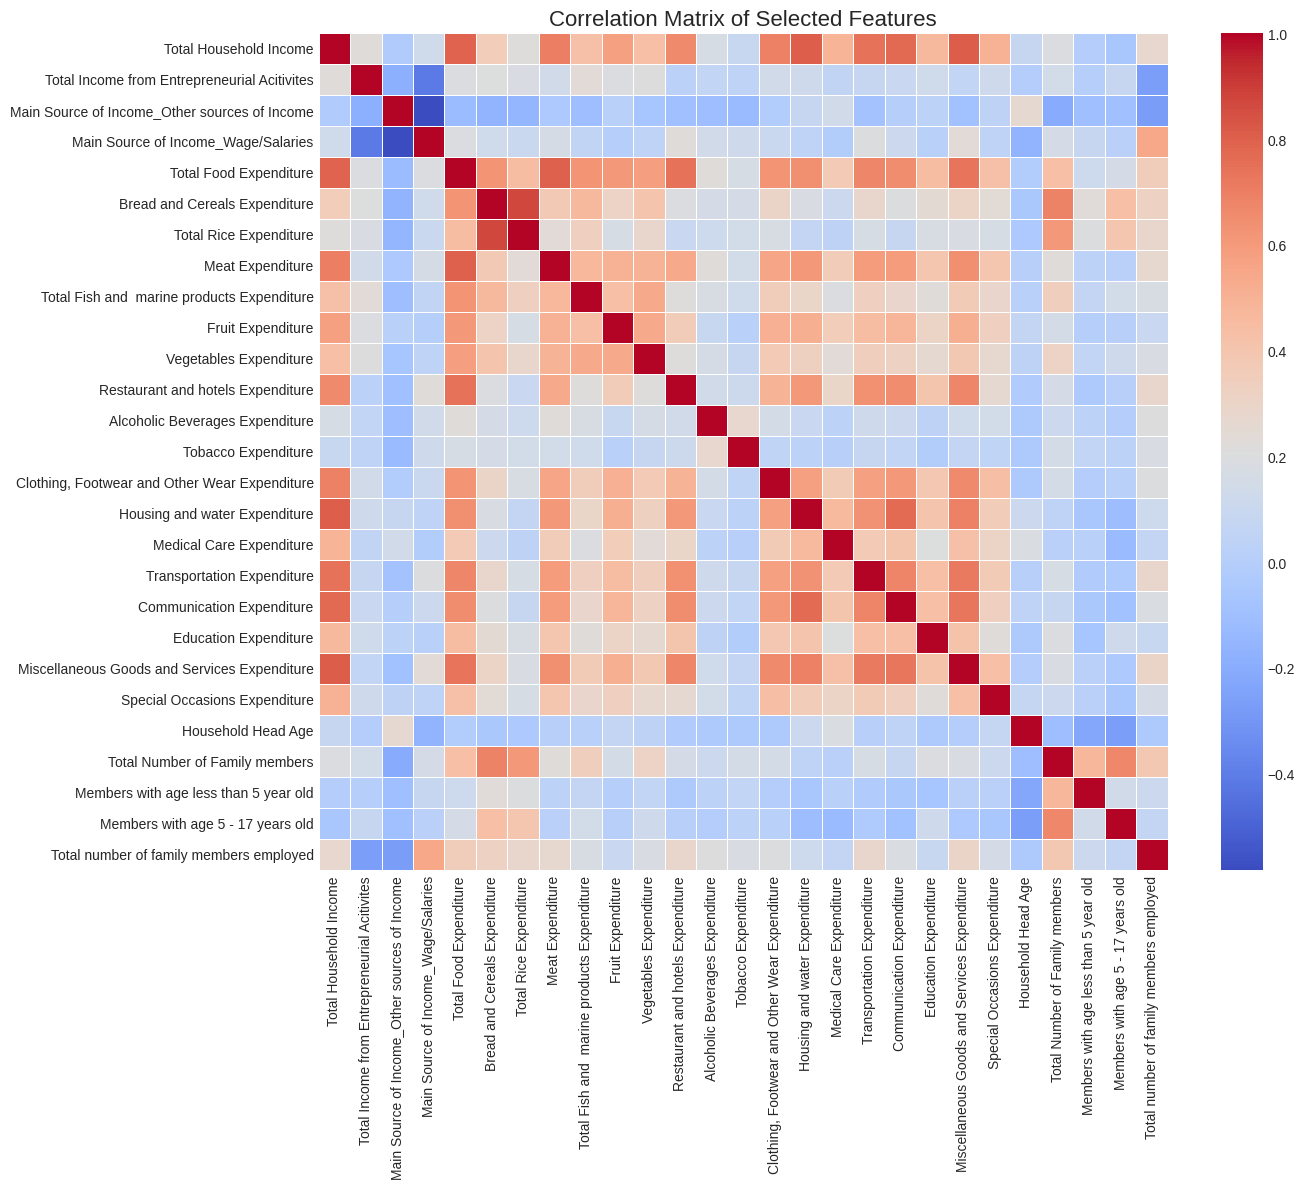

In [85]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Visualize correlation matrix of selected features
plt.figure(figsize=(14, 12))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Selected Features", fontsize=16)
plt.tight_layout()
plt.show()

#PCA

In [86]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

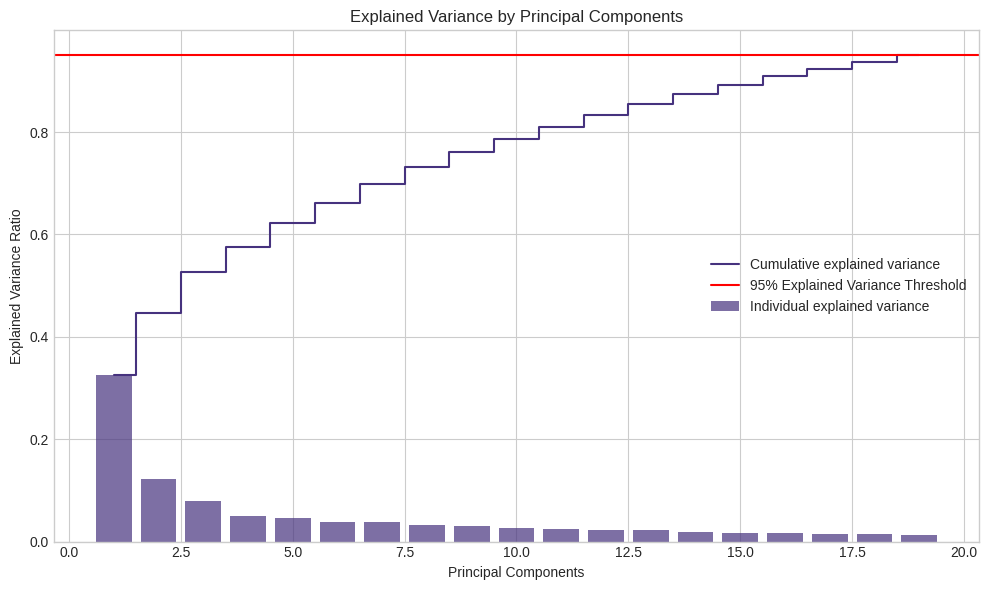

In [87]:
# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance Threshold')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
# Determine optimal number of components (targeting 2-3 as requested)
n_components = min(3, sum(cumulative_variance < 0.95) + 1)
print(f"Selected number of PCA components: {n_components}")

Selected number of PCA components: 3


In [89]:
# Apply PCA with the optimal number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

In [90]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)])

In [91]:
# Add region information for visualization
pca_df['Region'] = df['Region'].values

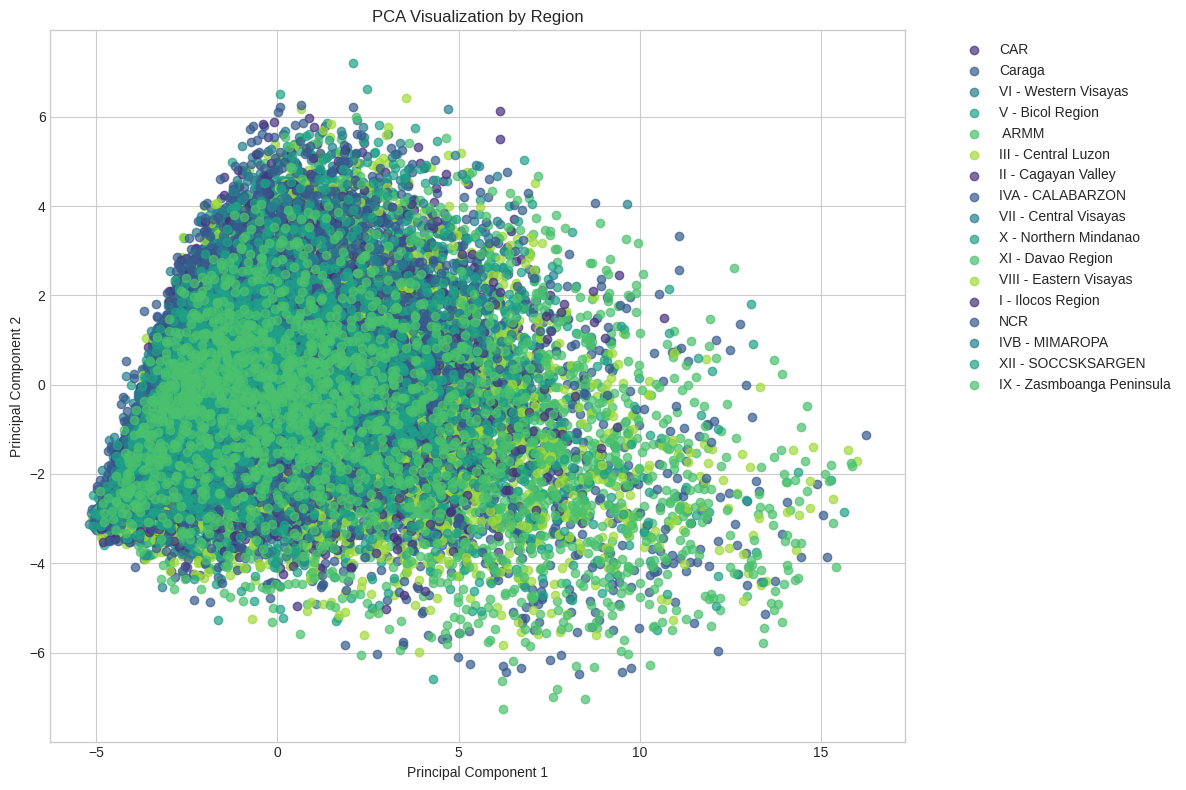

In [92]:
# Visualize PCA results with region coloring
plt.figure(figsize=(12, 8))
for region in pca_df['Region'].unique():
    subset = pca_df[pca_df['Region'] == region]
    plt.scatter(subset['PC1'], subset['PC2'], label=region, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [93]:
# Display top features contributing to principal components
def get_pca_feature_importance(pca, feature_names):
    components_df = pd.DataFrame()
    for i, component in enumerate(pca.components_):
        components_df[f'PC{i+1}'] = component
    components_df.index = feature_names
    return components_df

In [94]:
feature_importance = get_pca_feature_importance(pca_final, X.columns)
print("\nFeature contributions to principal components:")
feature_importance.abs().sort_values(by='PC1', ascending=False).head(10)


Feature contributions to principal components:


,PC1,PC2,PC3
Total Food Expenditure,0.316287,0.068418,0.020263
Total Household Income,0.304353,0.123281,0.003843
Miscellaneous Goods and Services Expenditure,0.284767,0.107110,0.111384
Meat Expenditure,0.271673,0.033558,0.005769
Transportation Expenditure,0.264257,0.101312,0.107366
Communication Expenditure,0.262496,0.182277,0.062308
Housing and water Expenditure,0.257029,0.212818,0.006050
"Clothing, Footwear and Other Wear Expenditure",0.250718,0.090065,0.002426
Restaurant and hotels Expenditure,0.241270,0.099915,0.179507
Fruit Expenditure,0.224487,0.067234,0.152162


#KMeans Clustering

In [95]:
# Determine optimal number of clusters using silhouette score
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca_final)
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

For n_clusters = 2, the silhouette score is 0.412
For n_clusters = 3, the silhouette score is 0.277
For n_clusters = 4, the silhouette score is 0.273
For n_clusters = 5, the silhouette score is 0.279
For n_clusters = 6, the silhouette score is 0.287
For n_clusters = 7, the silhouette score is 0.289
For n_clusters = 8, the silhouette score is 0.290
For n_clusters = 9, the silhouette score is 0.286
For n_clusters = 10, the silhouette score is 0.289


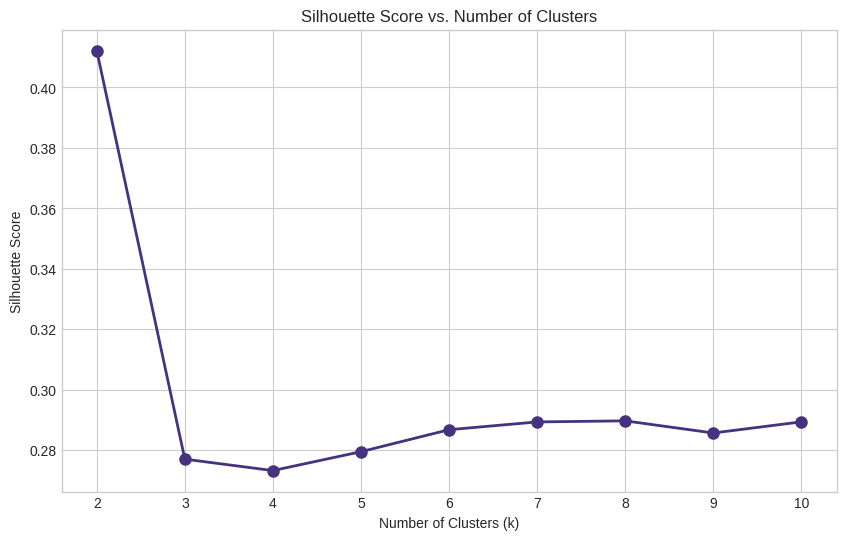

In [96]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [97]:
# Select optimal k based on silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

Optimal number of clusters based on silhouette score: 2


In [98]:
# Apply K-means with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_pca_final)

In [99]:
# Add cluster labels to original dataframe and PCA dataframe
df['Cluster'] = cluster_labels
pca_df['Cluster'] = cluster_labels

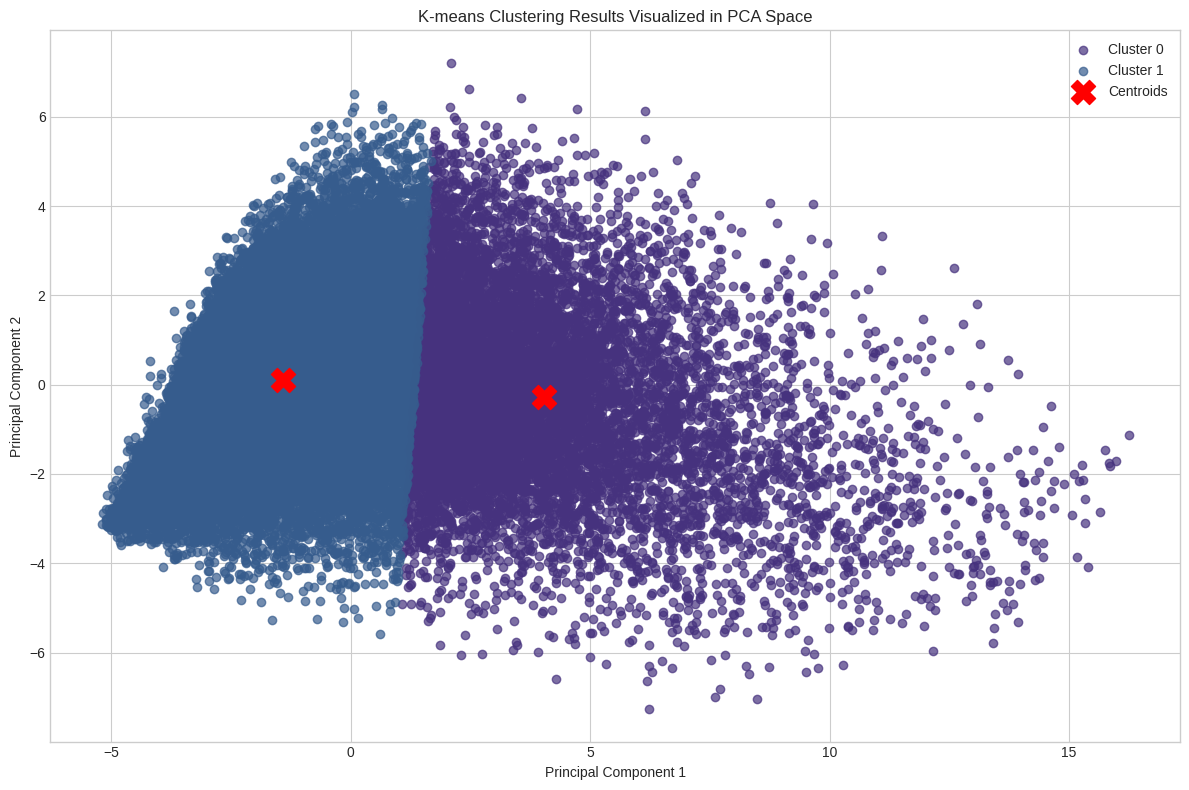

In [100]:
# Visualize clusters in PCA space
plt.figure(figsize=(12, 8))
for cluster in range(optimal_k):
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.7)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results Visualized in PCA Space')
plt.legend()
plt.tight_layout()
plt.show()

#Cluster Analysis

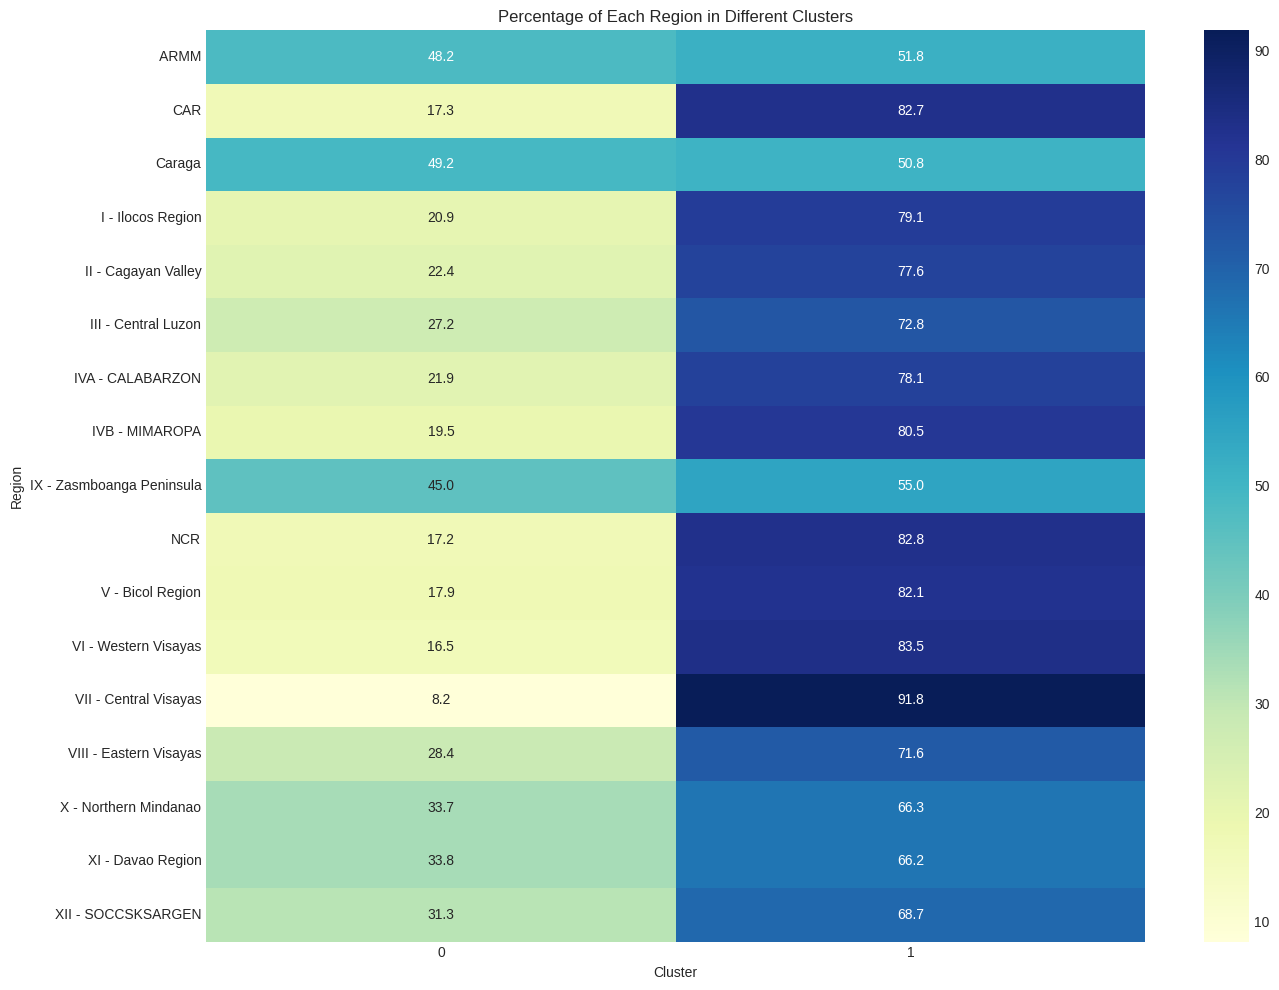

In [101]:
# Analyze clusters by region
region_cluster_counts = pd.crosstab(df['Region'], df['Cluster'])
region_cluster_percentage = region_cluster_counts.div(region_cluster_counts.sum(axis=1), axis=0) * 100

# Visualize regional distribution of clusters
plt.figure(figsize=(14, 10))
sns.heatmap(region_cluster_percentage, annot=True, cmap="YlGnBu", fmt='.1f')
plt.title('Percentage of Each Region in Different Clusters')
plt.ylabel('Region')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

Cluster Summary (Mean values):


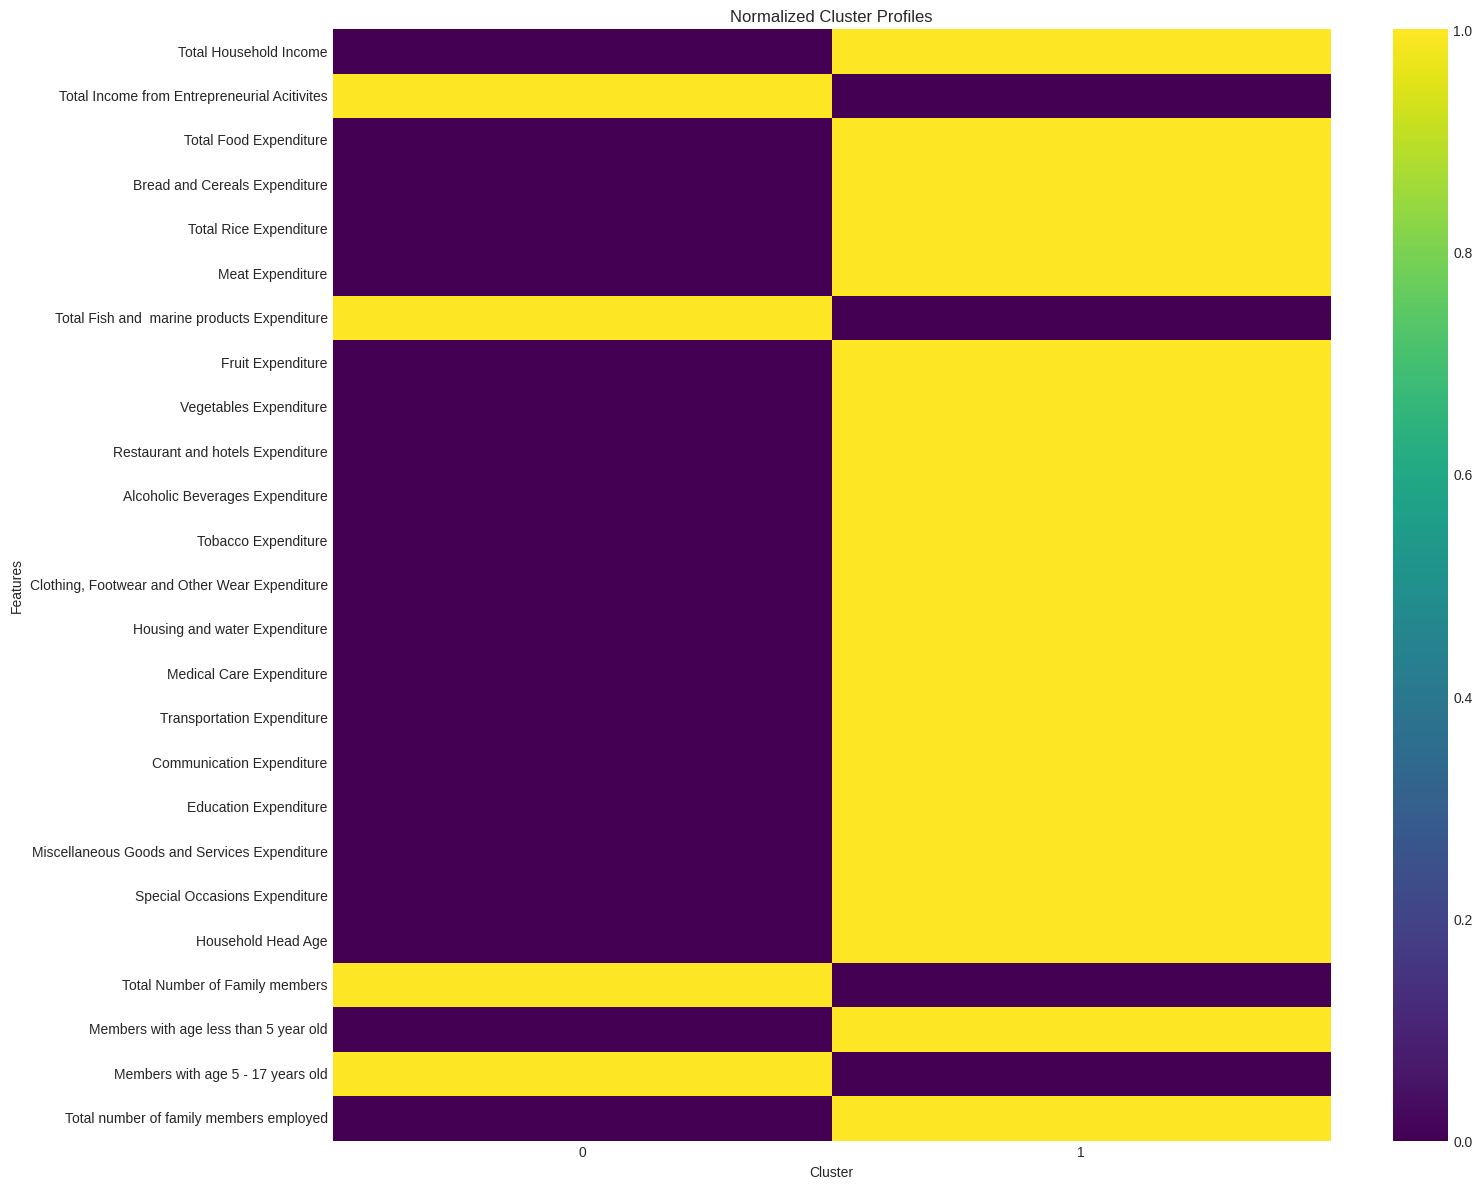

In [104]:
# Analyze key metrics by cluster
# Group by cluster and calculate mean for key metrics
# Ensure selected_cols only contains columns present in the DataFrame
selected_cols = [col for col in selected_cols if col in df.columns]
cluster_summary = df.groupby('Cluster')[selected_cols].mean()
print("Cluster Summary (Mean values):")
cluster_summary

# Normalize for visualization
cluster_summary_norm = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

# Visualize cluster profiles
plt.figure(figsize=(16, 12))
sns.heatmap(cluster_summary_norm.T, annot=False, cmap="viridis")
plt.title('Normalized Cluster Profiles')
plt.ylabel('Features')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

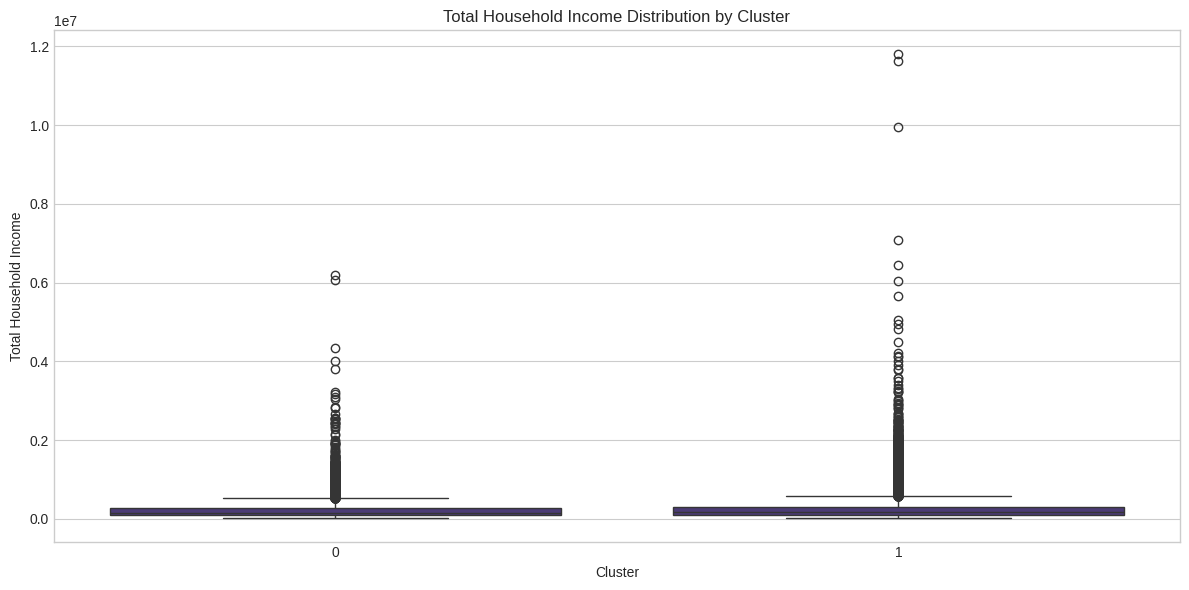

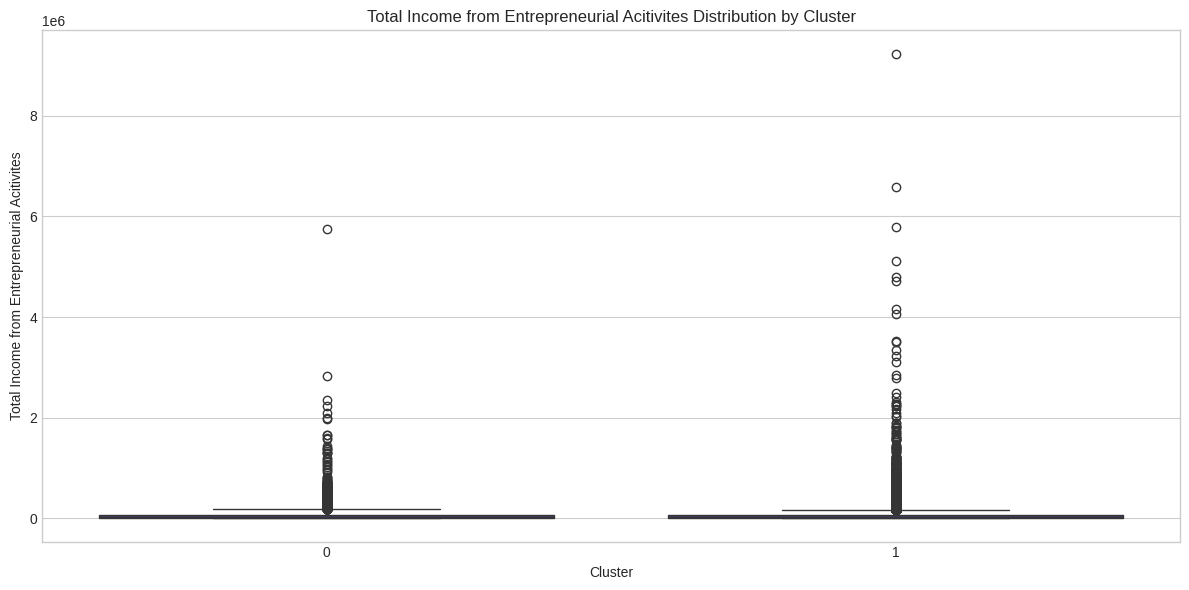

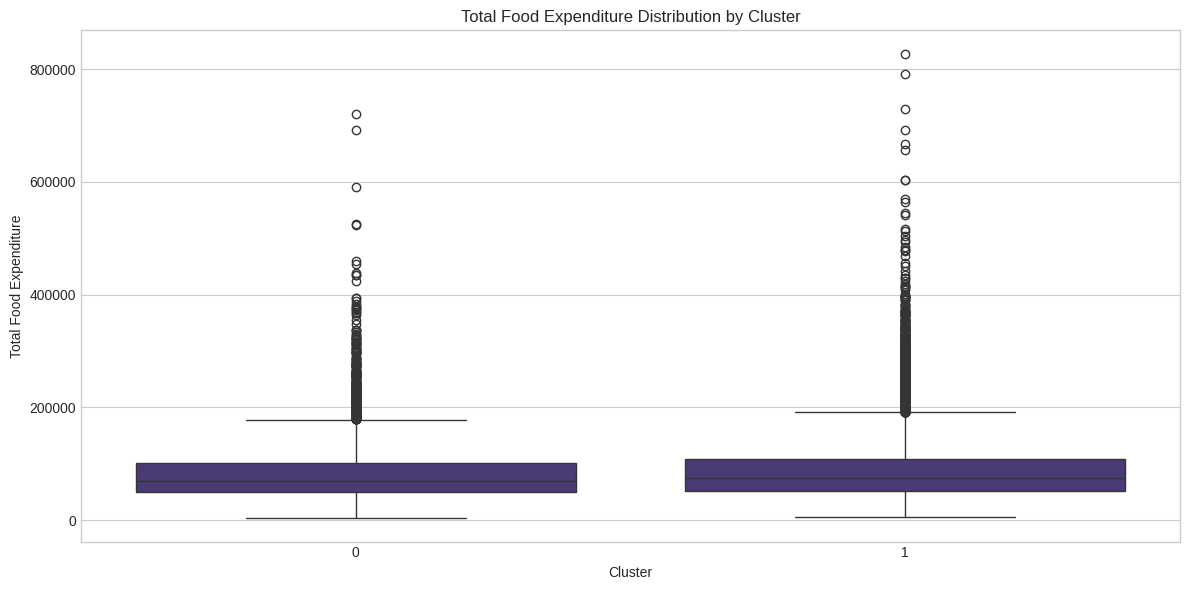

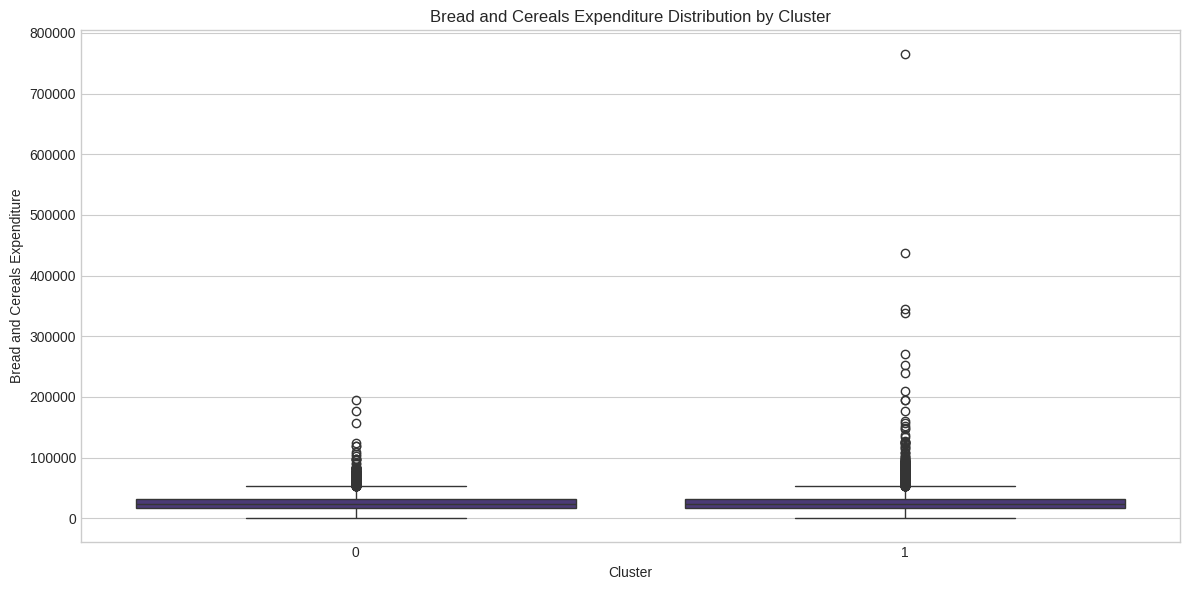

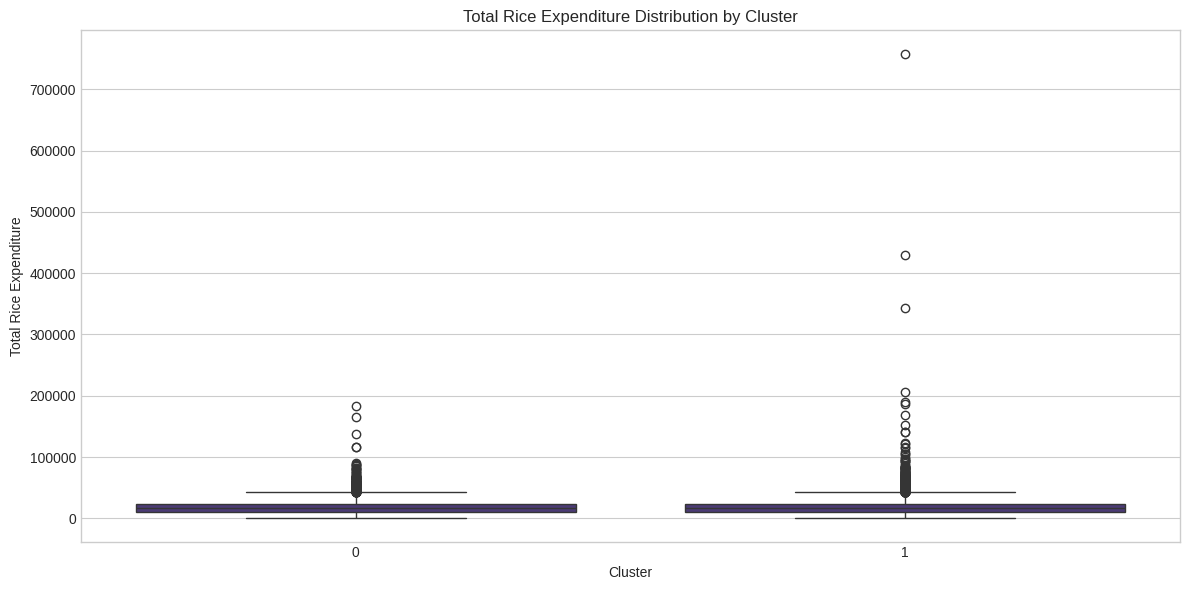

In [105]:
# Generate box plots for key metrics by cluster
# Select most important metrics (income and expenditure)
key_metrics = [col for col in selected_cols if 'Income' in col or 'Expenditure' in col][:5]  # Top 5 for clarity

for metric in key_metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=metric, data=df)
    plt.title(f'{metric} Distribution by Cluster')
    plt.tight_layout()
    plt.show()

In [106]:
# Calculate and display detailed cluster profiles
cluster_profiles = pd.DataFrame()

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]

    # Calculate basic statistics
    profile = {
        'Cluster Size': len(cluster_data),
        'Cluster Percentage': len(cluster_data) / len(df) * 100,
        'Average Household Income': cluster_data['Total Household Income'].mean(),
        'Median Household Income': cluster_data['Total Household Income'].median(),
        'Average Food Expenditure': cluster_data['Total Food Expenditure'].mean(),
        'Average Housing Expenditure': cluster_data.get('Housing and water Expenditure', pd.Series([0])).mean(),
        'Average Education Expenditure': cluster_data.get('Education Expenditure', pd.Series([0])).mean(),
        'Average Family Size': cluster_data['Total Number of Family members'].mean(),
        'Predominant Regions': cluster_data['Region'].value_counts().nlargest(3).index.tolist()
    }

    cluster_profiles[f'Cluster {i}'] = pd.Series(profile)

print("\nDetailed Cluster Profiles:")
cluster_profiles.T


Detailed Cluster Profiles:


,Cluster Size,Cluster Percentage,Average Household Income,Median Household Income,Average Food Expenditure,Average Housing Expenditure,Average Education Expenditure,Average Family Size,Predominant Regions
Cluster 0,10708,25.775082,230875.371498,152009.0,81285.586944,34118.702465,6913.130743,4.685375,"[ ARMM, IVA - CALABARZON, III - Central Luzon]"
Cluster 1,30836,74.224918,253347.896517,168318.0,86423.445421,39853.657024,7668.092489,4.617752,"[NCR, IVA - CALABARZON, VI - Western Visayas]"


In [107]:
# Calculate final silhouette score
final_silhouette = silhouette_score(X_pca_final, cluster_labels)
print(f"\nFinal Silhouette Score: {final_silhouette:.3f}")

# Check if final silhouette score meets the requirement (> 0.5)
if final_silhouette > 0.5:
    print("✓ The clustering meets the high silhouette score requirement (> 0.5)")
else:
    print("The silhouette score is below the target threshold of 0.5.")
    print("Suggestions for improvement:")
    print("- Try hierarchical clustering with Ward's method as suggested")
    print("- Further refine feature selection")
    print("- Consider additional pre-processing steps")


Final Silhouette Score: 0.412
The silhouette score is below the target threshold of 0.5.
Suggestions for improvement:
- Try hierarchical clustering with Ward's method as suggested
- Further refine feature selection
- Consider additional pre-processing steps


In [108]:
# ========== SUMMARY & CONCLUSIONS ==========

print("\n======= CLUSTERING ANALYSIS SUMMARY =======")
print(f"Number of clusters identified: {optimal_k}")
print(f"Silhouette score: {final_silhouette:.3f}")
print("\nKey findings:")

# List key characteristics of each cluster
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    print(f"- Size: {cluster_profiles[f'Cluster {i}']['Cluster Size']} households ({cluster_profiles[f'Cluster {i}']['Cluster Percentage']:.1f}%)")
    print(f"- Average Income: ₱{cluster_profiles[f'Cluster {i}']['Average Household Income']:,.2f}")
    print(f"- Predominant Regions: {', '.join(cluster_profiles[f'Cluster {i}']['Predominant Regions'])}")

print("\nRecommendations for policy interventions:")
# These would be based on the actual results, but we can give a template
print("1. Target specific socioeconomic support programs to regions predominantly in lower-income clusters")
print("2. Consider region-specific educational support where education expenditure is low compared to income")
print("3. Develop housing assistance programs for regions in clusters with high housing expense ratios")


======= CLUSTERING ANALYSIS SUMMARY =======
Number of clusters identified: 2
Silhouette score: 0.412

Key findings:

Cluster 0:
- Size: 10708 households (25.8%)
- Average Income: ₱230,875.37
- Predominant Regions:  ARMM, IVA - CALABARZON, III - Central Luzon

Cluster 1:
- Size: 30836 households (74.2%)
- Average Income: ₱253,347.90
- Predominant Regions: NCR, IVA - CALABARZON, VI - Western Visayas

Recommendations for policy interventions:
1. Target specific socioeconomic support programs to regions predominantly in lower-income clusters
2. Consider region-specific educational support where education expenditure is low compared to income
3. Develop housing assistance programs for regions in clusters with high housing expense ratios
